**Business Case: Scaler - Clustering**

**Problem Statement:** At Scaler, we aim to profile the best companies and job positions for our learners. As a data scientist in the analytics vertical, my task is to cluster a segment of learners based on their job profiles, companies they work for, and other relevant features. The objective is to create clusters with similar characteristics, enabling us to identify trends and insights about the most desirable companies and job roles within our learner base.

In [179]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [180]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv")

In [181]:
data.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [183]:
# dropping unnamed
data = data.drop(columns="Unnamed: 0")

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153279 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [185]:
data.describe()

,orgyear,ctc,ctc_updated_year
count,205757.000000,2.058430e+05,205843.000000
mean,2014.882750,2.271685e+06,2019.628231
std,63.571115,1.180091e+07,1.325104
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.300000e+05,2019.000000
50%,2016.000000,9.500000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


In [186]:
data['company_hash'] = data['company_hash'].astype('category')
data['email_hash'] = data['email_hash'].astype('category')
data['job_position'] = data['job_position'].astype('category')

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   company_hash      205799 non-null  category
 1   email_hash        205843 non-null  category
 2   orgyear           205757 non-null  float64 
 3   ctc               205843 non-null  int64   
 4   job_position      153279 non-null  category
 5   ctc_updated_year  205843 non-null  float64 
dtypes: category(3), float64(2), int64(1)
memory usage: 13.2 MB


In [188]:
data.duplicated().sum()

34

In [189]:
duplicated_rows = data[data.duplicated()]
duplicated_rows.head(50)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
97138,wtqtzwt xzw,bb8e4b09544daf1bfc8c7bb9a9ae1fee35490cf3f321b8...,2014.0,1000000,FullStack Engineer,2019.0
98085,2020,6ad3e6ab27462c2c7428fa5d51405933335341d4d969b5...,2020.0,720000,NaN,2019.0
102600,voxvz uvxzno,c7fac937a34f7ae432ff1d77466eb7ea6cf25dfd5ebcca...,2020.0,1280000,NaN,2019.0
109324,wgbwvon mhoxztoo,0442a51ef5080d7d40721c007131a1d5bdeabae2c1b153...,2016.0,700000,NaN,2019.0
110833,zgn vuurxwvmrt vwwghzn,8aad76cb5766c6b24c8eebfeb891cb548420690d0030a0...,2019.0,500000,NaN,2021.0
111354,uyxrxuo xzzgcvnxgz wvbuho,704d69965035d1c341b06fc5d83bf1b714f1625c0cf271...,2017.0,850000,iOS Engineer,2019.0
111521,aqggb ntwyzgrgsj,df81dac132d66a42a0c71a4799e1040731738e542c81ff...,2017.0,1270000,FullStack Engineer,2019.0
115241,rgfto wgbuvzxto xzw,ea363e930dabe0fbb63438e07775af3cb3b32639947c47...,2017.0,1100000,Backend Engineer,2019.0
117246,xatbxv,f451ceee50b1bfa3dc749c6aa8634ab3851a4ab961b003...,2019.0,640000,NaN,2019.0
117549,exzdtqv,e7df851527dd6f8ec95d5e13d9fb2a7255380245b808e3...,2020.0,1500000,NaN,2020.0


In [190]:
duplicated_rows.index

Index([ 97138,  98085, 102600, 109324, 110833, 111354, 111521, 115241, 117246,
       117549, 120371, 121946, 122316, 130495, 138371, 141686, 143061, 146097,
       151473, 157950, 161251, 164554, 165326, 171421, 175942, 179858, 180630,
       182531, 195375, 196492, 196971, 201165, 203257, 205733],
      dtype='int64')

In [191]:
# Drop duplicate rows
data = data.drop_duplicates()

In [192]:
data.duplicated().sum()

0

In [193]:
data.isnull().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52548
ctc_updated_year        0
dtype: int64

In [194]:
data.nunique()

company_hash         37299
email_hash          153443
orgyear                 77
ctc                   3360
job_position          1016
ctc_updated_year         7
dtype: int64

In [195]:
data["email_hash"].value_counts()

email_hash
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183     8
                                                                    ..
6296df85da8a54cacc42c0c336e8b20fae8724265ba98d6fa8b691628028ef89     1
629676b3952739aed981436c18552905f5892b7ae4e67196e04ebbe189020432     1
62964c22baef6736d4a15c12e9e77276fa474eb3137a1610b782f3241d46f9bd     1
629516b0b75f4c75860657a726219152897215d629b1506a2d698c1b641859d2     1
ffffa3eb3575f43b86d986911463dce7bcadcea227e5a4b0f1756744efdb7477     1
Name: count, Length: 153443, dtype: int64

In [196]:
data.isnull().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52548
ctc_updated_year        0
dtype: int64

In [197]:
# Adding YearsOFExperience Column
# Get the current year
current_year = datetime.now().year

# Calculate years of experience
data["yoe"] = current_year - data['orgyear']

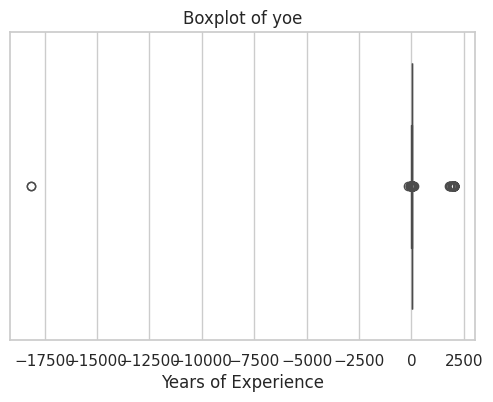

In [198]:
# Outlier Detection - Boxplot using Seaborn
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='yoe')
plt.title('Boxplot of yoe')
plt.xlabel('Years of Experience')
plt.show()

In [199]:
# Removing outliers - yoe can't be -ve value & more than 50 years is outlier based on my intution
negative_count = len(data[data['yoe'] < 0])
print(negative_count)

morethan_50_count = len(data[data['yoe'] > 50])
print(morethan_50_count)

43
49


In [200]:
# So, there are 92 rows outliers with respect to years of experience.
# Since, this is small amount of data, this can be negligible

In [201]:
data = data[(data['yoe'] >= 0) & (data['yoe'] <= 50)]

In [202]:
# Removing outliers - yoe can't be -ve value & more than 50 years is outlier based on my intution
negative_count = len(data[data['yoe'] < 0])
print(negative_count)

morethan_50_count = len(data[data['yoe'] > 50])
print(morethan_50_count)

0
0


In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205631 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   company_hash      205587 non-null  category
 1   email_hash        205631 non-null  category
 2   orgyear           205631 non-null  float64 
 3   ctc               205631 non-null  int64   
 4   job_position      153139 non-null  category
 5   ctc_updated_year  205631 non-null  float64 
 6   yoe               205631 non-null  float64 
dtypes: category(3), float64(3), int64(1)
memory usage: 16.3 MB


In [204]:
data.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,yoe
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,8.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,6.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,9.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,7.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,7.0


In [205]:
#Univariate Analysis - distribution plot for continuous variables & count plot for categorical variables

<ipython-input-206-6e59a5906f92>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CTC Range', order=labels, palette='viridis')


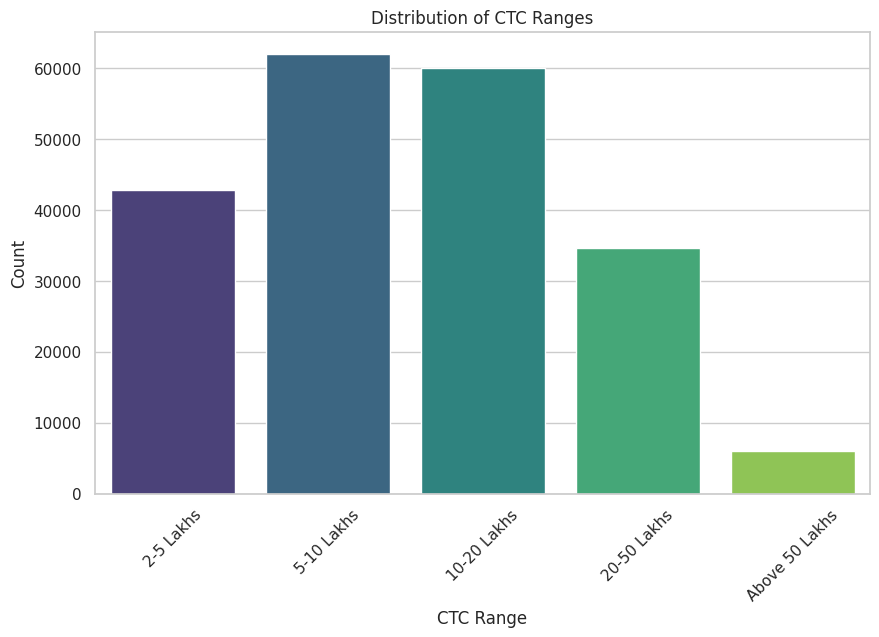

In [206]:
df = pd.DataFrame()
# Define custom bins/ranges for CTC
bins = [0, 500000, 1000000, 2000000, 5000000, float('inf')]
labels = ['2-5 Lakhs', '5-10 Lakhs', '10-20 Lakhs', '20-50 Lakhs', 'Above 50 Lakhs']

# Assign labels to bins based on CTC ranges
df['CTC Range'] = pd.cut(data['ctc'], bins=bins, labels=labels,right=False)

# Plot distribution using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CTC Range', order=labels, palette='viridis')
plt.title('Distribution of CTC Ranges')
plt.xlabel('CTC Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [207]:
# It looks like most of the learners are fall into 5 to 10 & 10 to 20 Lakhs CTCs.

<ipython-input-208-ed2198ac769a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Experience_Range', order=labels, palette='viridis')


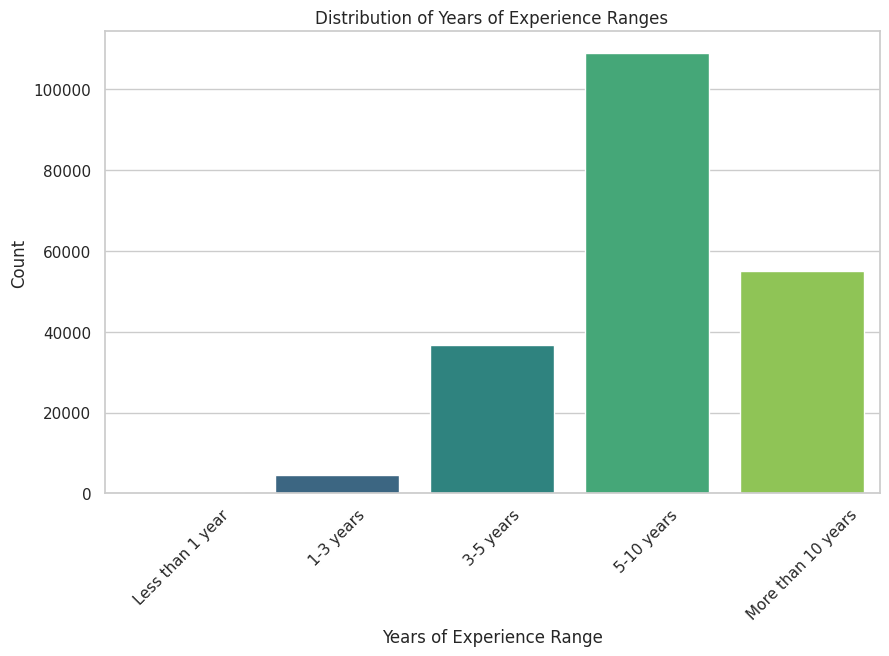

In [208]:
# Define custom bins/ranges for years of experience
bins = [0, 1, 3, 5, 10, float('inf')]
labels = ['Less than 1 year', '1-3 years', '3-5 years', '5-10 years', 'More than 10 years']

# Assign labels to bins based on years of experience
df['Experience_Range'] = pd.cut(data['yoe'], bins=bins, labels=labels)

# Plot distribution using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Experience_Range', order=labels, palette='viridis')
plt.title('Distribution of Years of Experience Ranges')
plt.xlabel('Years of Experience Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [209]:
# It looks like more than 1L learners are fall into 5 to 10 years of experience. Next, >10 years of learners then 3 to 5 years of learners.

<ipython-input-210-86d2d310d66f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data[data['job_position'].isin(top_job_positions.index)],


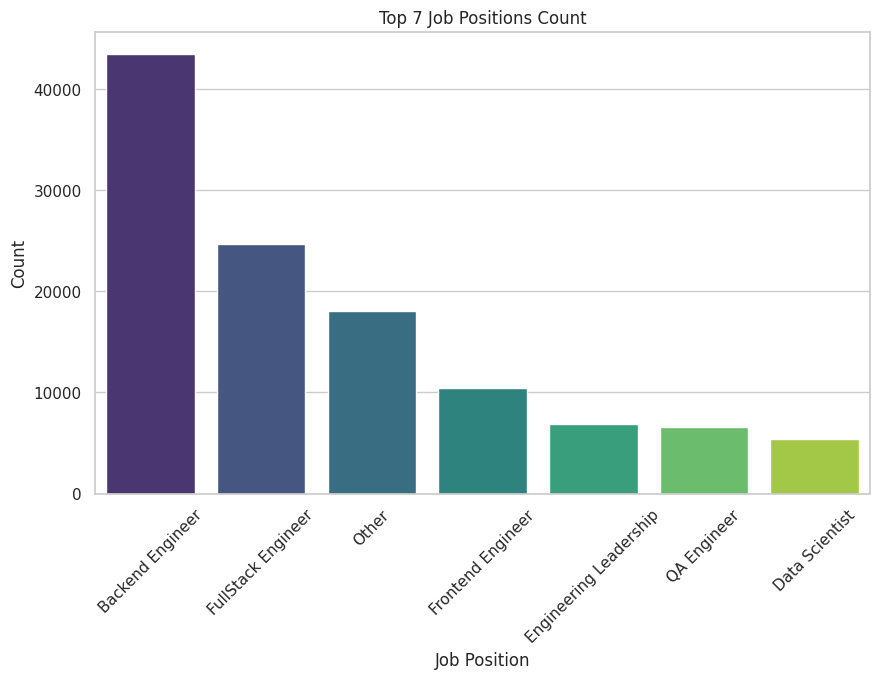

In [210]:
# Top 7 Job Positions

# Calculate top 7 job positions based on count
top_job_positions = data['job_position'].value_counts().nlargest(7)

# Plot count plot for top 7 job positions
plt.figure(figsize=(10, 6))
sns.countplot(data=data[data['job_position'].isin(top_job_positions.index)],
              x='job_position',
              order=top_job_positions.index,
              palette='viridis')
plt.title('Top 7 Job Positions Count')
plt.xlabel('Job Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [211]:
# Data Preprocessing
# Try to convert company_hash and job_position into numerical column using ordinal encoder for KNN Imputation
encoder = OrdinalEncoder()


# Fit and transform the categorical columns
data[['company_hash_encoded','job_position_encoded']] = encoder.fit_transform(data[['company_hash', 'job_position']])


In [212]:
data.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,yoe,company_hash_encoded,job_position_encoded
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,8.0,967.0,457.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,6.0,19695.0,292.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,9.0,15485.0,140.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,7.0,12088.0,140.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,7.0,20191.0,292.0


In [213]:
data["company_hash"].value_counts()[:20]

company_hash
nvnv wgzohrnvzwj otqcxwto    8335
xzegojo                      5378
vbvkgz                       3480
zgn vuurxwvmrt vwwghzn       3407
wgszxkvzn                    3238
vwwtznhqt                    2868
fxuqg rxbxnta                2653
gqvwrt                       2504
bxwqgogen                    2130
wvustbxzx                    2033
zvz                          1695
eqtoytq                      1498
vagmt                        1400
ywr ntwyzgrgsxto             1392
uvjnb                        1134
lubgqsvz wyvot  wg           1121
zgn vuurxwvmrt               1070
xmb                          1054
erxupvqn                      956
wxowg                         945
Name: count, dtype: int64

In [214]:
# Remove special characters from company hash
import re
def remove_special(text):
  cleaned_text = re.sub('[^A-Za-z0-9 ]+', '', text)
  return cleaned_text

In [215]:
data['company_hash'] = data['company_hash'].apply(remove_special)

In [216]:
new_data = data.drop(columns=["company_hash","job_position","email_hash"])

In [217]:
new_data.head()

,orgyear,ctc,ctc_updated_year,yoe,company_hash_encoded,job_position_encoded
0,2016.0,1100000,2020.0,8.0,967.0,457.0
1,2018.0,449999,2019.0,6.0,19695.0,292.0
2,2015.0,2000000,2020.0,9.0,15485.0,140.0
3,2017.0,700000,2019.0,7.0,12088.0,140.0
4,2017.0,1400000,2019.0,7.0,20191.0,292.0


In [218]:
# Create a KNN imputer
imputer = KNNImputer(n_neighbors=3)

# Impute the missing values
df_imputed = pd.DataFrame(imputer.fit_transform(new_data),columns=new_data.columns)
df_imputed.head()

,orgyear,ctc,ctc_updated_year,yoe,company_hash_encoded,job_position_encoded
0,2016.0,1100000.0,2020.0,8.0,967.0,457.0
1,2018.0,449999.0,2019.0,6.0,19695.0,292.0
2,2015.0,2000000.0,2020.0,9.0,15485.0,140.0
3,2017.0,700000.0,2019.0,7.0,12088.0,140.0
4,2017.0,1400000.0,2019.0,7.0,20191.0,292.0


In [219]:
# data - raw data
# new_data - encoded data
# df_imputed - knn imputed data

In [220]:
data.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,yoe,company_hash_encoded,job_position_encoded
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,8.0,967.0,457.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,6.0,19695.0,292.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,9.0,15485.0,140.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,7.0,12088.0,140.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,7.0,20191.0,292.0


**Manual Clustering**

In [221]:
# Filter to keep only top 3 companies based on count
top_companies = data['company_hash'].value_counts().nlargest(1).index
df_top = data[data['company_hash'].isin(top_companies)]

print(top_companies)

# Calculate 5-point summary statistics for the top 3 companies
# summary_stats = df_top.groupby(['company_hash', 'job_position', 'yoe'])['ctc'].agg(['mean', 'median', 'max', 'min', 'count'])

# summary_stats
# # Reset index to make columns accessible
# summary_stats = summary_stats.reset_index()

# # Plotting using seaborn
# plt.figure(figsize=(12, 6))
# sns.barplot(data=summary_stats, x='company_hash', y='mean', hue='job_position')
# plt.title('Mean CTC by Company and Job Position (Top 3 Companies)')
# plt.xlabel('Company')
# plt.ylabel('Mean CTC (Lakhs)')
# plt.xticks(rotation=45)
# plt.legend(title='Job Position')
# plt.show()

CategoricalIndex(['nvnv wgzohrnvzwj otqcxwto'], categories=['0', '0000', '01 ojztqsj', '05mz exzytvrny uqxcvnt rxbxnta', ..., 'zz', 'zzb ztdnstz vacxogqj ucn rna', 'zzgato', 'zzzbzb'], ordered=False, dtype='category', name='company_hash')


In [222]:
# Calculate average CTC for top company based on count and years of experience
df = data
top_company = df['company_hash'].value_counts().nlargest(1).index[0]
df_top_company = df[df['company_hash'] == top_company]
avg_ctc_by_experience = df_top_company.groupby('yoe')['ctc'].mean()

# Merge the average CTC back to the main DataFrame
df = pd.merge(df, avg_ctc_by_experience.rename('Average_CTC'), on='yoe', how='left')

# Create the "designation" column based on CTC comparison with average
df['designation'] = df.apply(lambda row: 1 if row['ctc'] < row['Average_CTC'] else (3 if row['ctc'] > row['Average_CTC'] else 2), axis=1)

print(df)

                     company_hash  \
0                  atrgxnnt xzaxv   
1       qtrxvzwt xzegwgbb rxbxnta   
2                   ojzwnvwnxw vx   
3                       ngpgutaxv   
4                      qxen sqghu   
...                           ...   
205626                  vuurt xzw   
205627                  husqvawgb   
205628                   vwwgrxnt   
205629             zgn vuurxwvmrt   
205630             bgqsvz onvzrtj   

                                               email_hash  orgyear      ctc  \
0       6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...   2016.0  1100000   
1       b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...   2018.0   449999   
2       4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...   2015.0  2000000   
3       effdede7a2e7c2af664c8a31d9346385016128d66bbc58...   2017.0   700000   
4       6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...   2017.0  1400000   
...                                                   ...      ...      ...   
20

In [223]:
df["designation"].value_counts()

designation
1    154690
3     50427
2       514
Name: count, dtype: int64

In [224]:
# Above analysis illustrates in the top company - 1.5L+ learners are earning less than average salary of same level experienced people.
# Above analysis illustrates in the top company - 50K+ learners are earning more than average salary of same level experienced people.

In [225]:
# Calculate average CTC for each company
avg_ctc_by_company = df.groupby('company_hash')['ctc'].mean()

# Sort companies based on average CTC and select top 10
top_10_companies = avg_ctc_by_company.nlargest(10)

print(top_10_companies)

company_hash
whmxw rgsxwo uqxcvnt rxbxnta            1.000150e+09
aveegaxr xzntqzvnxgzvr hzxctqoxnj       2.500000e+08
aggovz mgmwvn xzaxv uqxcvnt rxbxnta     2.000000e+08
agyv tdnqvwg                            2.000000e+08
ama uqgltwno rxbxnta                    2.000000e+08
anaw tduqtoo rxbxnta                    2.000000e+08
apvnxv                                  2.000000e+08
axctqoxexta tztqsj ogrhnxgzo ucn rna    2.000000e+08
bgax uqgltwn rxbxnta                    2.000000e+08
bjnqvy tztqsj xzaxv ucn rna             2.000000e+08
Name: ctc, dtype: float64


In [226]:
# Sort each group by CTC and get top 2 positions
top_2_positions = df.groupby(['company_hash','job_position']).apply(lambda x: x.nlargest(2, 'ctc'))

top_2_positions.head()

company_hash  \
company_hash                   job_position                                               
0                              Other             16803                                0   
0000                           Other             197335                            0000   
01 ojztqsj                     Android Engineer  74350                       01 ojztqsj   
                               Frontend Engineer 55175                       01 ojztqsj   
05mz exzytvrny uqxcvnt rxbxnta Backend Engineer  139720  05mz exzytvrny uqxcvnt rxbxnta   

                                                                                                email_hash  \
company_hash                   job_position                                                                  
0                              Other             16803   e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...   
0000                           Other             197335  b3f3bb98cbca4b1ce5dfd5abb4e500ce6f6b66288a5202...   
01 ojztqsj                     Android Engineer  74350   819789ff4068fd5c8facf8a5074cdd2e1ff989c95ae02c...   
                               Frontend Engineer 55175   e1e15fada844f35fcc33927343d0c80f55526b87c40eee...   
05mz exzytvrny uqxcvnt rxbxnta Backend Engineer  139720  4702229ffb6968c87b16fc57e730769e554184e322e111...   

                                                         orgyear      ctc  \
company_hash                   job_position                                 
0                              Other             16803    2020.0   100000   
0000                           Other             197335   2017.0   300000   
01 ojztqsj                     Android Engineer  74350    2016.0   270000   
                               Frontend Engineer 55175    2011.0   830000   
05mz exzytvrny uqxcvnt rxbxnta Backend Engineer  139720   2019.0  1100000   

                                                              job_position  \
company_hash                   job_position                                  
0                              Other             16803               Other   
0000                           Other             197335              Other   
01 ojztqsj                     Android Engineer  74350    Android Engineer   
                               Frontend Engineer 55175   Frontend Engineer   
05mz exzytvrny uqxcvnt rxbxnta Backend Engineer  139720   Backend Engineer   

                                                         ctc_updated_year  \
company_hash                   job_position                                 
0                              Other             16803             2020.0   
0000                           Other             197335            2020.0   
01 ojztqsj                     Android Engineer  74350             2019.0   
                               Frontend Engineer 55175             2019.0   
05mz exzytvrny uqxcvnt rxbxnta Backend Engineer  139720            2021.0   

                                                          yoe  \
company_hash                   job_position                     
0                              Other             16803    4.0   
0000                           Other             197335   7.0   
01 ojztqsj                     Android Engineer  74350    8.0   
                               Frontend Engineer 55175   13.0   
05mz exzytvrny uqxcvnt rxbxnta Backend Engineer  139720   5.0   

                                                         company_hash_encoded  \
company_hash                   job_position                                     
0                              Other             16803                    0.0   
0000                           Other             197335                   1.0   
01 ojztqsj                     Android Engineer  74350                    2.0   
                               Frontend Engineer 55175                    2.0   
05mz exzytvrny uqxcvnt rxbxnta Backend Engineer  139720                   3.0   

               

In [227]:
# Filter designation 1 and get top 10 employees based on CTC
top_10_designation_1 = df[df['designation'] == 3].nlargest(10, 'ctc')

top_10_designation_1.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,yoe,company_hash_encoded,job_position_encoded,Average_CTC,designation
72747,whmxw rgsxwo uqxcvnt rxbxnta,29a71dd13adf6d2d497571a565bb3096cf66cb46cd1ece...,2015.0,1000150000,NaN,2020.0,9.0,30452.0,NaN,3.272669e+06,3
117508,obvqnuqxdwgb,5b4bed51797140db4ed52018a979db1e34cee49e27b488...,2018.0,255555555,NaN,2016.0,6.0,14504.0,NaN,1.373786e+06,3
3297,aveegaxr xzntqzvnxgzvr hzxctqoxnj,06d231f167701592a69cdd7d5c825a0f5b30f0347a4078...,2021.0,250000000,NaN,2020.0,3.0,1216.0,NaN,1.599333e+06,3
106,oxburjyq ogrhnxgzo rru,996aef9bba62bd99d6cb8e8c112c0ec8096b203ae50b97...,2017.0,200000000,Support Engineer,2020.0,7.0,17512.0,871.0,2.042407e+06,3
301,ihvrxnvo srgmvr rru,2b649949f0a00c444db6ae38d66a972e37cc3a90ba65a0...,2017.0,200000000,QA Engineer,2020.0,7.0,9041.0,521.0,2.042407e+06,3


In [228]:
# Filter designation 1 and get bottom 10 employees based on CTC
bottom_10_designation_1 = df[df['designation'] == 3].nsmallest(10, 'ctc')

bottom_10_designation_1.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,yoe,company_hash_encoded,job_position_encoded,Average_CTC,designation
71013,vbvkgz,57490b74ccef0192e9fcf547aa22f4898c038c255a098b...,1996.0,360000,NaN,2018.0,28.0,26504.0,NaN,300000.000000,3
44492,zgafxz svbxzs,6d10795a00417f08de7082546569275c31d0b5f9364ec0...,2023.0,420000,FullStack Engineer,2021.0,1.0,35847.0,292.0,413333.333333,3
73042,ntrtutqegqbvzwt,85bc997ebb7acdd691f7f68251865f40cb3db15f9f4780...,2023.0,450000,NaN,2020.0,1.0,12997.0,NaN,413333.333333,3
78698,wgszxkvzn,4716efd2d694d9baf28a6898babe3b181efed63f5a047a...,1996.0,450000,Frontend Engineer,2021.0,28.0,30166.0,287.0,300000.000000,3
107183,wgszxkvzn,4716efd2d694d9baf28a6898babe3b181efed63f5a047a...,1996.0,450000,NaN,2021.0,28.0,30166.0,NaN,300000.000000,3


**Unsupervised Learning - Clustering**

In [229]:
df_imputed.head()

,orgyear,ctc,ctc_updated_year,yoe,company_hash_encoded,job_position_encoded
0,2016.0,1100000.0,2020.0,8.0,967.0,457.0
1,2018.0,449999.0,2019.0,6.0,19695.0,292.0
2,2015.0,2000000.0,2020.0,9.0,15485.0,140.0
3,2017.0,700000.0,2019.0,7.0,12088.0,140.0
4,2017.0,1400000.0,2019.0,7.0,20191.0,292.0


In [230]:
df_imputed.isnull().sum()

orgyear                 0
ctc                     0
ctc_updated_year        0
yoe                     0
company_hash_encoded    0
job_position_encoded    0
dtype: int64

In [231]:
# Standardization

# Create StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns
df_standardized = pd.DataFrame(scaler.fit_transform(df_imputed),columns=df_imputed.columns)

In [232]:
df_standardized.head()

,orgyear,ctc,ctc_updated_year,yoe,company_hash_encoded,job_position_encoded
0,0.208789,-0.099235,0.280523,-0.208789,-1.659673,0.853620
1,0.681772,-0.154353,-0.473993,-0.681772,0.008531,-0.074728
2,-0.027702,-0.022918,0.280523,0.027702,-0.366477,-0.929932
3,0.445280,-0.133154,-0.473993,-0.445280,-0.669066,-0.929932
4,0.445280,-0.073796,-0.473993,-0.445280,0.052712,-0.074728


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

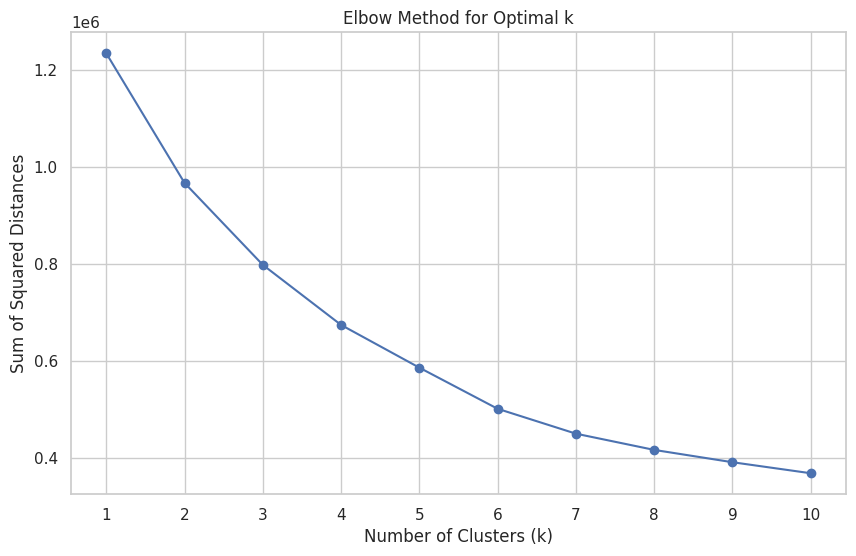

In [233]:
# Elbow method to find optimum K vlaue
# Initialize an empty list to store the sum of squared distances
ssd = []

# Try different values of k (number of clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(df_standardized)
    ssd.append(kmeans.inertia_)  # Sum of squared distances to the nearest centroid

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), ssd, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [234]:
# Calculating silhoutte score taking more time and frequently runtime disconnected in colab

In [235]:
# # Silhoutte score method to find the optimum K value

# # Initialize an empty list to store silhouette scores
# silhouette_scores = []

# # Try different values of k (number of clusters)
# for k in range(2, 6):
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     cluster_labels = kmeans.fit_predict(df_standardized)
#     silhouette_avg = silhouette_score(df_standardized, cluster_labels)
#     print("silhouette_avg - ",silhouette_avg)
#     silhouette_scores.append(silhouette_avg)

# # Plot the silhouette scores
# plt.figure(figsize=(10, 6))
# plt.plot(range(2, 11), silhouette_scores, marker='o')
# plt.title('Silhouette Score for Different k')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Silhouette Score')
# plt.xticks(range(2, 11))
# plt.grid(True)
# plt.show()

# For k = 2 ->0.99

**# K-means clustering**

In [236]:

kmeans = KMeans(n_clusters=4)
kmeans_clusters = kmeans.fit_predict(df_standardized.to_numpy())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [237]:
kmeans_clusters

array([2, 2, 2, ..., 1, 1, 2], dtype=int32)

In [238]:
data.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,yoe,company_hash_encoded,job_position_encoded
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,8.0,967.0,457.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,6.0,19695.0,292.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,9.0,15485.0,140.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,7.0,12088.0,140.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,7.0,20191.0,292.0


In [239]:
data["label"] = kmeans_clusters

In [240]:
data["label"].value_counts()

label
2    81394
1    78928
0    43974
3     1335
Name: count, dtype: int64

In [241]:
data.head(50)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,yoe,company_hash_encoded,job_position_encoded,label
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,8.0,967.0,457.0,2
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,6.0,19695.0,292.0,2
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,9.0,15485.0,140.0,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,7.0,12088.0,140.0,2
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,7.0,20191.0,292.0,2
5,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,18f2c4aa2ac9dd3ae8ff74f32d30413f5165565b90d8f2...,2018.0,700000,FullStack Engineer,2020.0,6.0,35518.0,292.0,1
6,lubgqsvz wyvot wg,9bf128ae3f4ea26c7a38b9cdc58cf2acbb8592100c4128...,2018.0,1500000,FullStack Engineer,2019.0,6.0,10147.0,292.0,2
7,vwwtznhqt ntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,2019.0,400000,Backend Engineer,2019.0,5.0,29118.0,140.0,1
8,utqoxontzn ojontbo,e245da546bf50eba09cb7c9976926bd56557d1ac9a17fb...,2020.0,450000,NaN,2019.0,4.0,25367.0,NaN,1
9,xrbhd,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5...,2019.0,360000,NaN,2019.0,5.0,33082.0,NaN,1


In [242]:
df_standardized.head()

,orgyear,ctc,ctc_updated_year,yoe,company_hash_encoded,job_position_encoded
0,0.208789,-0.099235,0.280523,-0.208789,-1.659673,0.853620
1,0.681772,-0.154353,-0.473993,-0.681772,0.008531,-0.074728
2,-0.027702,-0.022918,0.280523,0.027702,-0.366477,-0.929932
3,0.445280,-0.133154,-0.473993,-0.445280,-0.669066,-0.929932
4,0.445280,-0.073796,-0.473993,-0.445280,0.052712,-0.074728


In [243]:
data.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,yoe,company_hash_encoded,job_position_encoded,label
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,8.0,967.0,457.0,2
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,6.0,19695.0,292.0,2
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,9.0,15485.0,140.0,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,7.0,12088.0,140.0,2
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,7.0,20191.0,292.0,2


In [244]:
x = data.iloc[:, [1, 5]].values

In [245]:
#visulaizing the clusters  - this is taking more time
plt.scatter(x[kmeans_clusters == 0, 0], x[kmeans_clusters == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster
plt.scatter(x[kmeans_clusters == 1, 0], x[kmeans_clusters == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster
plt.scatter(x[kmeans_clusters== 2, 0], x[kmeans_clusters == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster
plt.scatter(x[kmeans_clusters == 3, 0], x[kmeans_clusters == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], s = 300, c = 'yellow', label = 'Centroid')
plt.title('Clusters of customers')
plt.xlabel('Years of Exp')
plt.ylabel('CTC')
plt.legend()
plt.show()

KeyboardInterrupt: 

**Hierarchical Clustering**

In [ ]:
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.metrics import silhouette_score
# import scipy.cluster.hierarchy as shc

In [ ]:
# plt.figure(figsize =(8, 8))
# plt.title('Visualising the data')
# Dendrogram = shc.dendrogram((shc.linkage(df_standardized, method ='ward')))

In [ ]:
# ac4 = AgglomerativeClustering(n_clusters = 4)

# plt.figure(figsize =(6, 6))
# plt.scatter(df_standardized[1], df_standardized[5],
#             c = ac4.fit_predict(df_standardized), cmap ='rainbow')
# plt.show()

In [246]:
data.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,yoe,company_hash_encoded,job_position_encoded,label
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,8.0,967.0,457.0,2
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,6.0,19695.0,292.0,2
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,9.0,15485.0,140.0,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,7.0,12088.0,140.0,2
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,7.0,20191.0,292.0,2


In [247]:
data["label"].value_counts()

label
2    81394
1    78928
0    43974
3     1335
Name: count, dtype: int64

In [248]:
result_analysis = data.groupby('label').agg({'ctc': 'mean', 'yoe': 'mean'}).reset_index()

In [249]:
result_analysis.head()

,label,ctc,yoe
0,0,2.038098e+06,15.031610
1,1,1.195822e+06,7.141547
2,2,1.260049e+06,7.255338
3,3,1.350334e+08,8.526592


In [251]:
data1 = data[data['label'] == 0]

In [252]:
data1["job_position"].value_counts()

job_position
Backend Engineer                    9707
Engineering Leadership              5096
FullStack Engineer                  3257
Other                               2512
Frontend Engineer                   2468
                                    ... 
Member Technical Staff III             0
Member Technical Staff Zoho            0
Member of Technical Staff (JAVA)       0
Member of Technical Staff (MTS)        0
Programmer Analyst Trainee             0
Name: count, Length: 1016, dtype: int64

In [254]:
data2 = data[data['label'] == 1]
data2["job_position"].value_counts()

job_position
Backend Engineer             15853
FullStack Engineer           10368
Other                         7506
Frontend Engineer             3928
QA Engineer                   2478
                             ...  
Online Reputation Manager        0
Operation associate              0
Operations Expert                0
Operations Lead                  0
technology analyst               0
Name: count, Length: 1016, dtype: int64

In [255]:
data3 = data[data['label'] == 2]
data3["job_position"].value_counts()

job_position
Backend Engineer             17813
FullStack Engineer           10953
Other                         7699
Frontend Engineer             3964
QA Engineer                   2378
                             ...  
N                                0
NCE                              0
Na                               0
Network Software Engineer        0
technology analyst               0
Name: count, Length: 1016, dtype: int64

In [256]:
data4 = data[data['label'] == 3]
data4["job_position"].value_counts()

job_position
Other                                   337
Backend Engineer                        146
FullStack Engineer                      119
Data Analyst                             61
Support Engineer                         57
                                       ... 
Lead Consultant                           0
Lead Consultant Technology                0
Lead Design Engineer                      0
Lead Engineer - Software Development      0
technology analyst                        0
Name: count, Length: 1016, dtype: int64

**# Actionable Insights & Recommendations**

**Targeted Professional Development:** Offer tailored professional development programs or advanced courses for learners in Cluster 3 and senior roles in Cluster 0 to maintain engagement and support career advancement at high levels. For Clusters 1 and 2, focus on upskilling programs that enable progression to more senior roles, enhancing their value in the job market.

**Customized Learning Pathways:** Develop customized learning pathways that align with the predominant job positions within each cluster. For example, technical leadership courses for Cluster 0, foundational and intermediate tech courses for Clusters 1 and 2, and specialized, high-level courses for Cluster 3.

**Engagement and Retention Strategies:** Implement engagement and retention strategies targeting the unique needs of each cluster. For the larger clusters (1 and 2), consider community-building activities and mentorship programs to foster a sense of belonging and support. For the smaller, high-value Cluster 3, personalized learning experiences and direct access to industry experts may enhance engagement and retention.

**Compensation Insight Tools:** Implement tools or resources on your platform that provide market compensation insights relative to a learner's experience and job role, given the wide range in CTC and YOE.